---
<a name='title'></a>
# **<font color="Navy"> Modelación Climática </font>**
## **<font color="RoyalBlue"> Tema 2: Introducción a la modelación numérica </font>**
### **<font color="DodgerBlue"> Notebook 4: Las ecuaciones de Lorenz </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---



In [1]:
import numpy as np
from IPython.display import HTML
import math
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)

## **<font color="ForestGreen">  El sistema de ecuaciones de Lorenz </font>**

El sistema de ecuaciones de Lorenz es un conjunto de ecuaciones diferenciales ordinarias que describen el comportamiento de un sistema dinámico no lineal que exhibe comportamiento caótico. Fue propuesto por Edward Lorenz en 1963 como un modelo simplificado para estudiar la convección atmosférica y la dinámica del clima. El sistema consta de tres ecuaciones diferenciales acopladas, que describen la evolución en el tiempo de tres variables dinámicas: $x$, $y$ y $z$. Estas variables representan el estado del sistema en un espacio tridimensional. Las ecuaciones de Lorenz son sensibles a las condiciones iniciales y exhiben un comportamiento dinámico complejo, incluida la formación de estructuras fractales y la dependencia sensitiva a las condiciones iniciales, características distintivas del caos determinista. El sistema de ecuaciones de Lorenz ha demostrado ser de gran importancia en campos como la meteorología, la física de fluidos, la teoría del caos y la dinámica no lineal, contribuyendo significativamente a nuestra comprensión de la complejidad inherente a los sistemas dinámicos.

\begin{align}
\frac{dx}{dt}=\sigma \,(y-x) \\
\frac{dy}{dt}=x (\rho -z) - y \\ 
\frac{dz}{dt}=x\,y - \beta z \\
\end{align}

donde $x$, $y$ y $z$ son las 3 variables de interés, que las podemos pensar como la posición de un objeto en 3 dimensiones ($x$, $y$ y $z$), y $\sigma$, $\rho$ y $\beta$ son coeficientes que determinan cómo varían las 3 variables. Aunque podemos interpretar el significado de los 3 coeficientes en el contexto de este sistema de ecuaciones, no tienen gran interpretación física. 

Las ecuaciones originales de Lorenz eran mucho más complejas y estaban basadas en las ecuaciones fundamentales de la dinámica de fluidos que gobiernan el comportamiento de la atmósfera. Sin embargo, Lorenz simplificó estas ecuaciones para crear un modelo más manejable y comprensible que aún conservara las características esenciales de la dinámica atmosférica.

Luego, mostramos el resultado con el método de diferencias finitas. 

<div class="alert alert-block alert-info">
<b>Nota:</b> Es importante mencionar que en el sistema de Lorenz las soluciones son las 3 variables dinámicas como función del tiempo. Es decir, buscamos obtener $x(t)$, $y(t)$ y $z(t)$ para un cierto tiempo de simulación. 
</div>

En resumen, el sistema de Lorenz está compuesto por tres variables dinámicas: $x$, $y$, y $z$ cada una de las cuales evoluciona de acuerdo con ecuaciones no lineales determinadas por 3 coeficientes que son constantes. 

En la siguiente celda, definimos las ecuaciones del sistema de Lorenz y las resolvemos con la fórmula de Runge-Kutta que habíamos venido utilizando. 


In [2]:
# ecuaciones del sistema de lorenz
def lorenz(t, xyz, sigma, rho, beta):
    """
    Sistema de Lorenz
    
    Input:
    
    t: tiempo actual de la solución
    xyz: tupla o arreglo de 3 elementos con los valores actuales de la variables x, y z en ese orden. 
    sigma: coeficiente 
    rho: coeficiente
    beta: coeficiente 
    
    Returns:
    Arreglo de 3 elementos con los valores de la tasa de cambio de x, y y z con respecto al tiempo segun las ecuaciones de Lorenz
    
    """
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])
# Método de Runge-Kutta de cuarto orden (RK4)
def rk4_step(t, xyz, sigma, rho,beta,dt):
    k1 = dt * lorenz(t, xyz, sigma,rho, beta)
    k2 = dt * lorenz(t + 0.5 * dt,  xyz + 0.5 * k1, sigma,rho, beta)
    k3 = dt * lorenz(t + 0.5 * dt,  xyz + 0.5 * k2, sigma,rho, beta)
    k4 = dt * lorenz(t + dt,  xyz + k3, sigma,rho, beta)
    return xyz + (k1 + 2 * k2 + 2 * k3 + k4) / 6

Ahora queremos resolver el modelo para ciertos parámetros. Al ser un modelo más didáctico o ilustrativo, lo importante es entender los conceptos de lo que está sucediendo, más que los parámetros. 

Específicamente, usamos los siguientes parámetros porque ayudan a ilustrar el sistema, no porque tengan gran significado físico. 

#### Condiciones iniciales 

$x_0=1$, $y_0=0$, $z_0=0$.

$\sigma=10$, $\rho=28$, $\beta=\frac{8}{3}$.


In [3]:
# Parámetros
dt = 0.01  # Paso de tiempo
t_max = 6 # Tiempo máximo de simulación

# condiciones iniciales
condiciones_iniciales = np.array([1.0, 0.0, 0.0])

# Parámetros del sistema de Lorenz
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Preparacion de la Simulación
t_values = np.arange(0, t_max, dt)
x_values = np.zeros_like(t_values)
y_values = np.zeros_like(t_values)
z_values = np.zeros_like(t_values)

xyz = condiciones_iniciales

# Ciclo para resolver la simulacion, los resultados se guardan en x_values, y_values y z_values
for i, t in enumerate(t_values):
    x_values[i] = xyz[0]
    y_values[i] = xyz[1]
    z_values[i] = xyz[2]
    
    xyz = rk4_step(t, xyz, sigma,rho, beta,dt)


Graficamos como líneas las 3 soluciones como función del tiempo. 

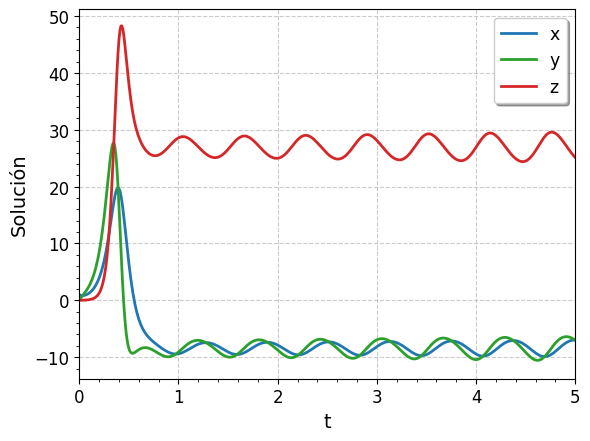

In [4]:
plt.plot(t_values,x_values,c='tab:blue',linewidth=2,label='x')
plt.plot(t_values,y_values,c='tab:green',linewidth=2,label='y')
plt.plot(t_values,z_values,c='tab:red',linewidth=2,label='z')
lineplot_setup(0,5,'t','Solución',ymin=None,ymax=None,title=None,legend=True)

Una vez graficadas las soluciones como función del tiempo para las 3 variables podemos graficar cómo varían las 3 al mismo tiempo. 

Para esto puede ser útil un gráfico 3D donde queremos graficar las series de tiempo de $x$ y $y$ en las dos dimensiones horizontales y $z$ en la dimensión vertical, como podría ser intuitivo. 

Para hacer una gráfica 3D necesitamos un poco más de ayuda de matplotlib. 

Para esto tenemos que declarar la projección al hacer el plot. Para ver más ejemplos que el siguiente y entenderle un poco más, pueden revisar: https://matplotlib.org/stable/gallery/mplot3d/projections.html. 

Ahora bien, para declarar la proyección hay varias maneras, pero una de ellas es primero definir un objeto de figura, plt.figure y luego agregarle un subplot a ese mismo objeto fig.add_subplot() ahí podemos decirle en qué posición poner el subplot (111) y qué projección lleva (projection='3d'). 

Recuerden que estamos graficando la evolución de las 3 variables ($x,y,z$) al mismo tiempo.



AttributeError: 'XTick' object has no attribute 'label'

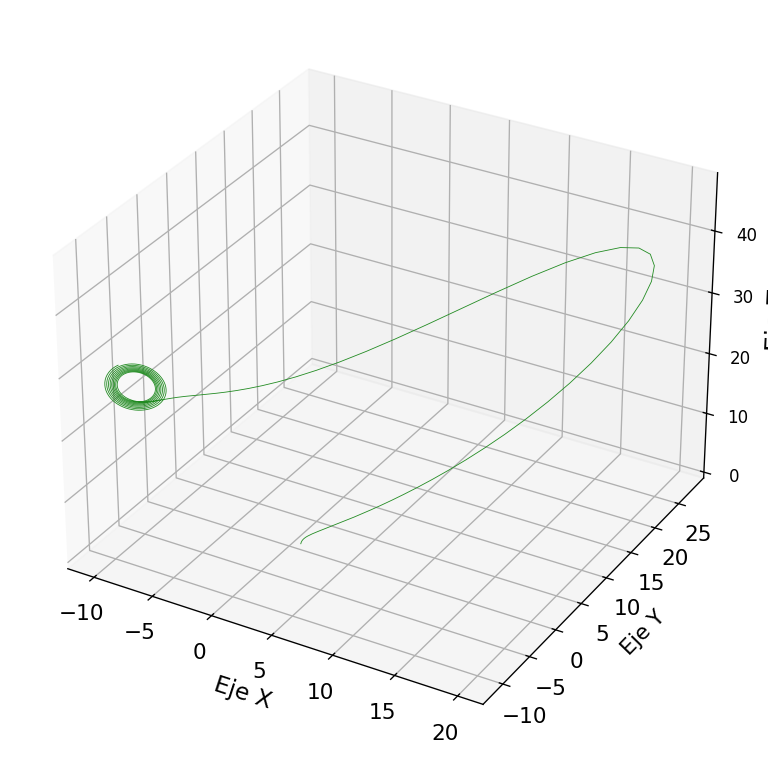

In [5]:
fig = plt.figure(figsize=(9, 8),dpi=120)
# grafica 3D necesita declarar antes de plot que será en 3 dimensiones
# agregamos un objeto de figura 3D
ax = fig.add_subplot(111, projection="3d")
ax.plot(x_values, y_values, z_values, color="forestgreen", linewidth=0.5)

# Poner nombre a los ejes
ax.set_xlabel("Eje X",fontsize=14)
ax.set_ylabel("Eje Y",fontsize=13)
ax.set_zlabel("Eje Z",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# cambiarle el tamaño a las ticks del eje z
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(11)
ax.set_title("Atractor de Lorenz",fontsize=15)


---
<a name='ej-1'></a>
### **<font color="OrangeRed">Ejemplo </font>**

<font color="DarkRed"> En el siguiente ejemplo vamos a variar las condiciones iniciales del modelo de Lorenz, dejando igual los parámetros del modelo. Para esto, vamos a comparar un primer experimento (control) con otro segundo experimento con condiciones iniciales ligeramente diferentes. 
    
#### **<font color="DarkRed">   1. Experimento control: </font>**
    
<font color="DarkRed">   - Tiempo de simulación 25 s. 
    
<font color="DarkRed">    - $x_0=1$, $y_0=1$, $z_0=1$.
    
<font color="DarkRed">     -$\sigma=10$, $\rho=28$, $\beta=\frac{8}{3}$.

    
#### **<font color="DarkRed">    2. Experimento 1: </font>**
    
<font color="DarkRed">   - Tiempo de simulación 25 s. 
    
<font color="DarkRed">    - $x_0=1$, $y_0=1.01$, $z_0=1.01$.
    
<font color="DarkRed">     -$\sigma=10$, $\rho=28$, $\beta=\frac{8}{3}$.
    

<font color="DarkRed"> Graficaremos sólo x(t) para contrarrestar ambos experimentos más fácilmente. 

---

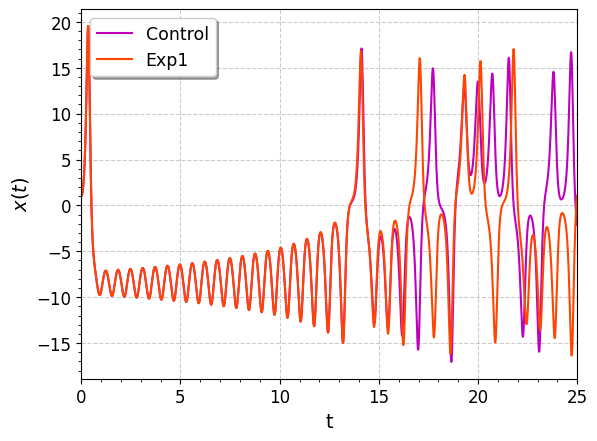

In [7]:
t_max = 25 # Tiempo máximo de simulación
t_values = np.arange(0, t_max, dt)

# condiciones iniciales, primero control
#                                    x0   y0   z0
condiciones_iniciales_1 = np.array([1.0, 1.0, 1.0])
condiciones_iniciales_2 = np.array([1.0,1.01,1.01])

resultados_Lorenz=np.zeros((2,len(t_values),3))

for ii,init_condit in enumerate([condiciones_iniciales_1,condiciones_iniciales_2]):
    x_values = np.zeros_like(t_values)
    y_values = np.zeros_like(t_values)
    z_values = np.zeros_like(t_values)

    xyz = init_condit
    for i, t in enumerate(t_values):
        x_values[i] = xyz[0]
        y_values[i] = xyz[1]
        z_values[i] = xyz[2]

        xyz = rk4_step(t, xyz, sigma,rho, beta,dt)
    
    plt.plot(t_values,x_values,c=['m','orangered'][ii],label=['Control','Exp1'][ii])
    resultados_Lorenz[ii,:,0]=x_values
    resultados_Lorenz[ii,:,1]=y_values
    resultados_Lorenz[ii,:,2]=z_values
lineplot_setup(0,25,'t','$x(t)$',ymin=None,ymax=None,title=None,legend=True)

En la gráfica anterior podemos ver que a pesar de ser una solución casi exactamente igual durante los primeros 15 instantes de tiempo, a partir del tiempo 16, se empiezan a diferenciar los dos experimentos hasta que para el tiempo 20 ya empiezan a tener soluciones completamente independientes. 

Este ejemplo es muy parecido al experimento que llevó a Lorenz a proponer su teoría. Podemos pensar en su experimento con pronósticos del tiempo como análogo a los resultados de este ejercicio ya que él hizo exactamente la misma simulación pero utilizando resultados redondeados para comenzar a hacer sus cálculos. Ese pequeño cambio en la condición inicial, dado por el redondeo, llevó a diferentes soluciones después de cierto tiempo. 

Ahora vamos a graficar en 3D estos dos experimentos y ver si podemos ilustrar mejor las diferencias. 

In [8]:
x_control=resultados_Lorenz[0,:,0]
y_control=resultados_Lorenz[0,:,1]
z_control=resultados_Lorenz[0,:,2]

x_exp1=resultados_Lorenz[1,:,0]
y_exp1=resultados_Lorenz[1,:,1]
z_exp1=resultados_Lorenz[1,:,2]

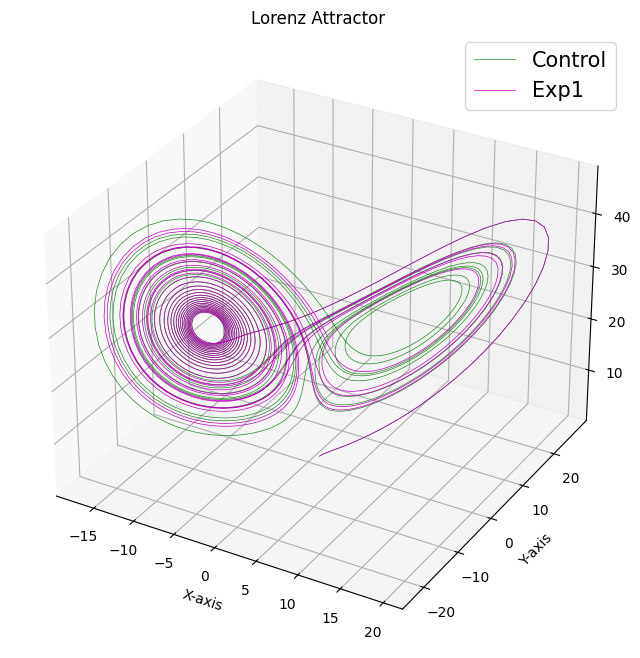

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

ax.plot(x_control,y_control,z_control, color="forestgreen", linewidth=0.5,label='Control')
ax.plot(x_exp1, y_exp1, z_exp1, color="m", linewidth=0.5,label='Exp1')
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("Lorenz Attractor")
plt.legend(fontsize=15,fancybox=True)

## **<font color="ForestGreen">  Animación para animarnos y terminar el tema 3 </font>**

In [9]:
#t_max = 45 # Tiempo máximo de simulación
t_values = np.arange(0, t_max, dt)
condiciones_iniciales_1 = np.array([1.0, 1.0, 1.0])
condiciones_iniciales_2 = np.array([1.0,1.01,1.01])

resultados_Lorenz=np.zeros((2,len(t_values),3))

for ii,init_condit in enumerate([condiciones_iniciales_1,condiciones_iniciales_2]):
    x_values = np.zeros_like(t_values)
    y_values = np.zeros_like(t_values)
    z_values = np.zeros_like(t_values)

    xyz = init_condit
    for i, t in enumerate(t_values):
        x_values[i] = xyz[0]
        y_values[i] = xyz[1]
        z_values[i] = xyz[2]

        xyz = rk4_step(t, xyz, sigma,rho, beta,dt)
    
    resultados_Lorenz[ii,:,0]=x_values
    resultados_Lorenz[ii,:,1]=y_values
    resultados_Lorenz[ii,:,2]=z_values


[(0.0, 40.0), Text(0.5, 0, 'Z')]

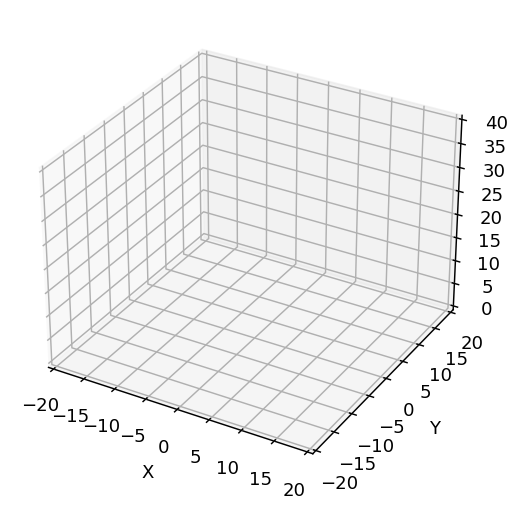

In [10]:
xyz=np.array(resultados_Lorenz[0])
xyz_exp1=np.array(resultados_Lorenz[1])

fig=plt.figure(figsize=(6.7,4.7),dpi=130)
ax = fig.add_subplot(111, projection="3d")
line, = ax.plot(xyz[0:1,0], xyz[0:1, 1], xyz[0:1,2], c='forestgreen',linewidth=0.5)
line2, = ax.plot(xyz_exp1[0:1,0], xyz_exp1[0:1, 1], xyz_exp1[0:1,2], c='m',linewidth=0.5)

def update(frame):
    x = xyz[:frame, 0]
    y = xyz[:frame, 1]
    z = xyz[:frame, 2]
    line.set_data(x,y)
    line.set_3d_properties(z)
    x = xyz_exp1[:frame, 0]
    y = xyz_exp1[:frame, 1]
    z = xyz_exp1[:frame, 2]
    line2.set_data(x,y)
    line2.set_3d_properties(z)
    return line,

# Setting the axes properties
ax.set(xlim3d=(-20, 20), xlabel='X')
ax.set(ylim3d=(-20, 20), ylabel='Y')
ax.set(zlim3d=(0, 40), zlabel='Z')

#ani = FuncAnimation(fig, update, frames=2400, interval=8,blit=True)

#HTML(ani.to_jshtml())

